<a href="https://colab.research.google.com/github/ylorenzi/Bootcamp-Alura-Data-Science/blob/main/Bootcamp-Alura-Data-Science/Projetos/Modulo1/Projeto_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Formato dos números nos gráficos
pd.options.display.float_format = "{:.0f}".format

In [ ]:
df = pd.read_csv("/content/obitos_mes.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.set_index("Unidade da Federação")

# Na base de dados existem colunas com formato object. A seguir duas formas de identificar quais são essas colunas

In [ ]:
df_num = df.select_dtypes(exclude=[np.number])
df_num.columns

Index(['2009/Set'], dtype='object')

In [ ]:
df.loc[:,df.dtypes == object].columns

Index(['2009/Set'], dtype='object')

In [ ]:
df['2009/Set'] = pd.to_numeric(df['2009/Set'], errors='coerce')

In [ ]:
df = df.drop("Total",axis=1)


In [ ]:
df.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,...,235,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,nan,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,...,106,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,...,403,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796


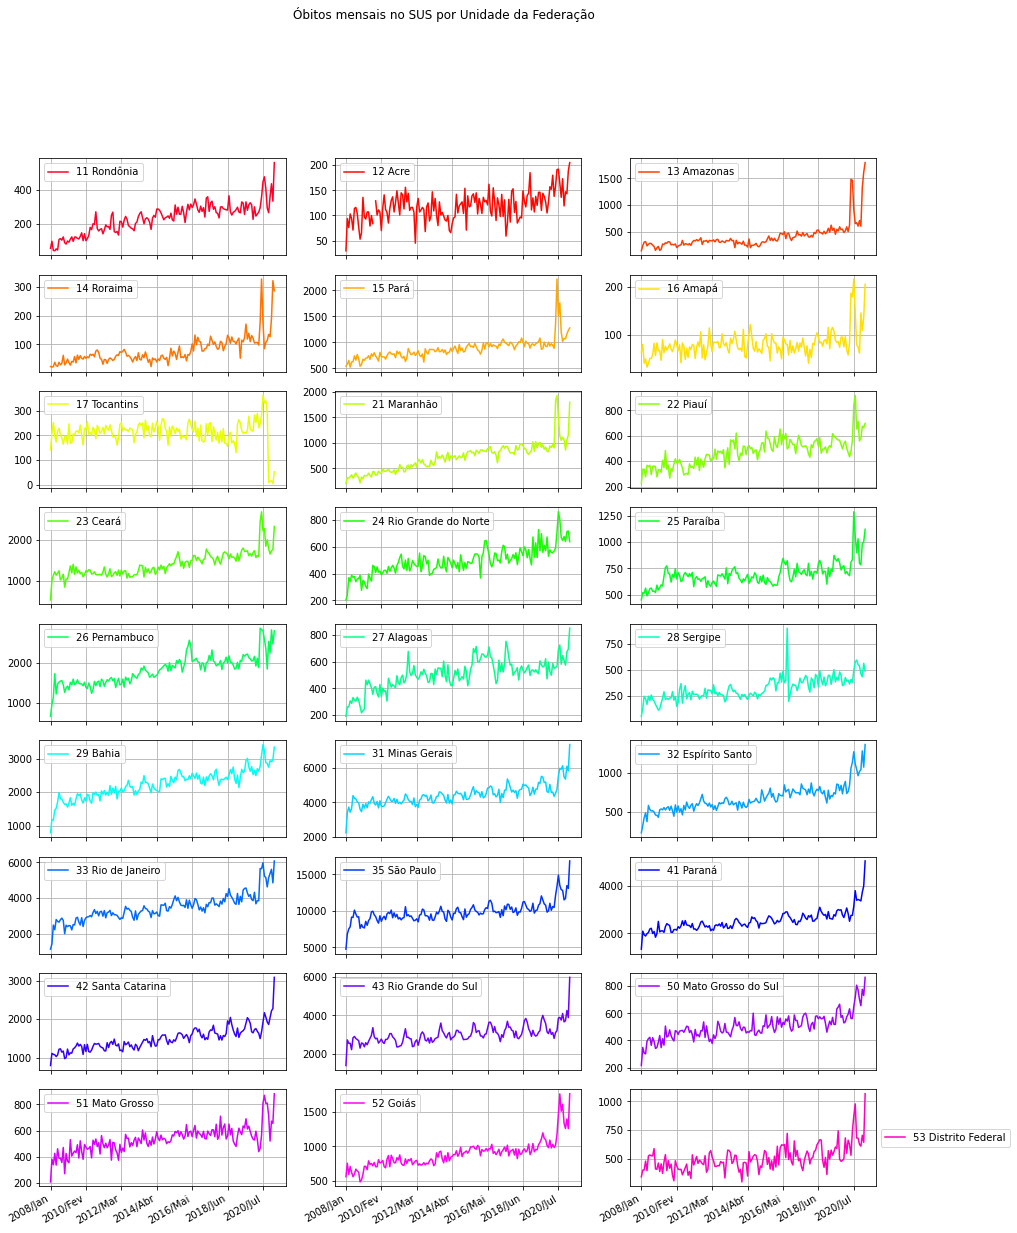

In [ ]:
df.T.plot(grid=True,figsize=(15,21),colormap="gist_rainbow",subplots=True,layout=(9,3),title="Óbitos mensais no SUS por Unidade da Federação")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

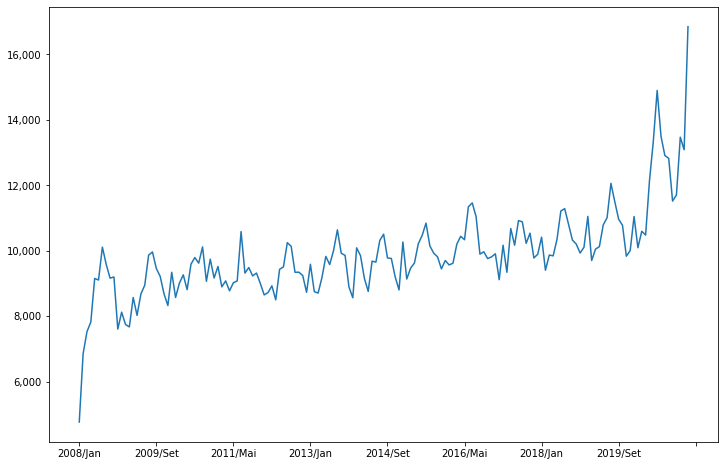

In [ ]:
ax = df.T["35 São Paulo"].plot(figsize=(12,8,))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

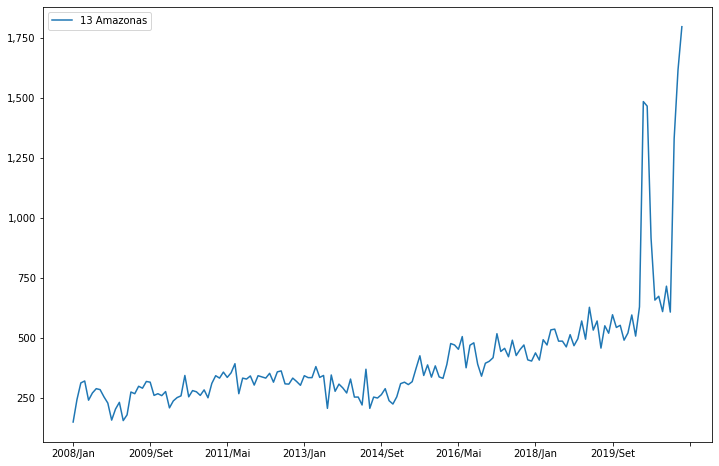

In [ ]:
ax = df.T["13 Amazonas"].plot(figsize=(12,8,))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend()

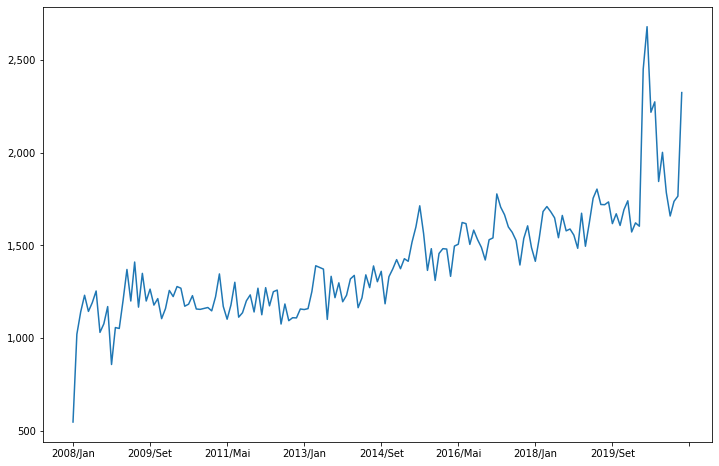

In [ ]:
ax = df.T["23 Ceará"].plot(figsize=(12,8,))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

In [ ]:
pop = pd.read_csv("/content/A140816189_28_143_208.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12,thousands=".")
pop = pop.set_index("Unidade da Federação")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
pop = pop.loc[:,"2008":"2019"]
pop.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,
11 Rondônia,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225
12 Acre,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935
13 Amazonas,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597
14 Roraima,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761
15 Pará,7321493,7457119,7588078,7688593,7822205,7999729,8104880,8206923,8305359,8366628,8513497,8602865


In [ ]:
pop.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008,1493566,680073,3341096,412783,7321493,613164,1280509,6305539,3119697,8450527,3106430,3742606,8734194,3127557,1999374,14502575,19850072,3453648,15872362,41011635,10590169,6052587,10855214,2336058,2957732,5844996,2557158
2009,1503928,691132,3393369,421499,7457119,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2010,1560501,732793,3480937,451227,7588078,668689,1383453,6569683,3119015,8448055,3168133,3766834,8796032,3120922,2068031,14021432,19595309,3512672,15993583,41252160,10439601,6249682,10695532,2449341,3033991,6004045,2562963
2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
2012,1590011,758786,3590985,469524,7822205,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6383286,10770603,2505088,3115336,6154996,2648532


In [ ]:
gastos = pd.read_csv("/content/ValorTotalAnoProcessamento.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12,thousands=".",decimal=",",engine="python")
gastos = gastos.set_index("Unidade da Federação")

In [ ]:
gastos.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528,2931283,1541683,1525315,1645954,1406151,3065279,3231495,3117179,3068430,2825839,2931174,2885269,2860104,3684945,3607290,3774357,3706712,3763188,3533626,3605007.43,3907033,3939821,3901084,3684407,3623016,3890462,4193534,4534401,4451208,4874593,4460802,5067886,4511093,4394680,4098742,4411499,3868618,4298703,5062171,...,7998346,8893684,8867793,8871408,8501602,8315108,8525500,9177611,7368996,8835095,8328187,8408513,9351706,8143008,8949742,9630553,9581970,7891114,9792371,9170788,8816847,10024554,9675424,8085026,9222011,7493901,8148169,7353768,7739864,9246098,11824687,11733308,10201985,7955139,9357946,8880837,9266015,7730597,11023309,996411255
12 Acre,902416,1497206,1794028,1730469,1819444,1828496,2511755,2089107,2275709,1923887,1756987,2235640,2497116,2253558,2122674,2834318,2722066,2432832,2630191,2307579,-,2826477,2170791,2541526,2491042,1954474,2389996,2654879,2844085,2336207,2125143,2430294,2377738,2184747,2468453,2516285,3051370,2629104,2485452,2685361,...,3576595,2444567,2602434,3064163,2276237,3239474,3126430,2998866,2619710,3018049,3342614,2123426,2664655,1906430,3096440,2411628,2840631,3260154,3250723,3204999,3052746,3124802,3021522,2874871,3331804,3417691,3076003,2286643,2896340,3045246,3915193,3640143,3391242,4044321,3276590,3696997,3715723,3538428,4077046,450048530
13 Amazonas,4735529,7118991,8196635,8259378,7831400,8477274,9368859,9352533,9363099,8618319,6555549,7777646,7403068,6683347,9927781,8844511,9079036,8832895,9373396,9578326,9730634.16,9179253,8314649,9050439,9419461,8680179,9168055,9897902,9651362,10854599,10417123,8718347,8221592,9613977,9927574,9470661,9736751,8745260,9380112,10179342,...,13572263,13083082,14322305,14643341,14632208,14500521,14840533,14427621,15818964,16358463,15391164,14154363,16791397,14369987,16339025,15622911,16483167,15422243,15961988,15787897,16515442,15788849,15784686,14388607,16063451,14939977,15107057,13534658,19698749,21129394,19769460,18059931,17841016,16408315,19895618,17765168,21430289,25917135,22032176,1917247936


In [ ]:
gastos.loc[:,gastos.dtypes == object].columns

Index(['2009/Set'], dtype='object')

In [ ]:
gastos['2009/Set'] = pd.to_numeric(gastos['2009/Set'], errors='coerce')

In [ ]:
gastos = gastos.drop("Total",axis=1)

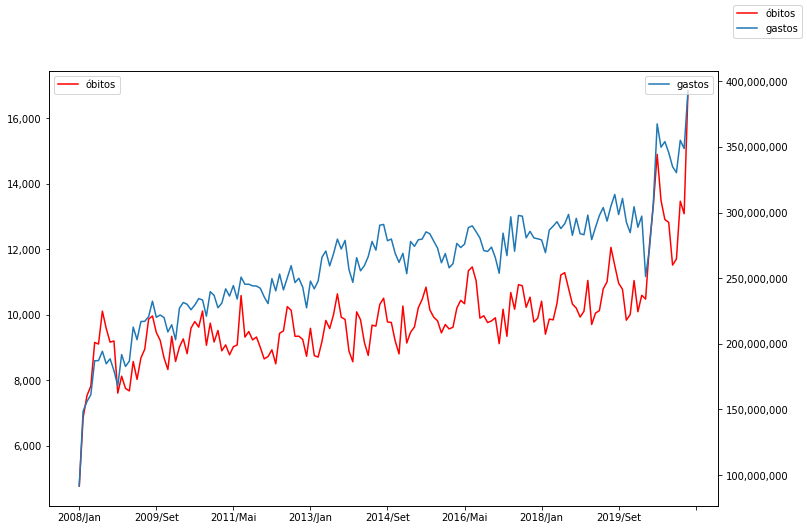

In [ ]:
fig,ax =plt.subplots()
df.T["35 São Paulo"].plot(figsize=(12,8,),color="r",ax=ax,label="óbitos")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2 = ax.twinx()
gastos.T["35 São Paulo"].plot(figsize=(12,8,),ax=ax2,label="gastos")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
fig.legend(loc="upper right")
ax.legend()
ax2.legend(loc=1)
plt.show()

In [ ]:
gastos.T

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,1388528,902416,4735529,657890,18864744,1120973,3441593,10723506,7985142,15539822,5947814,10723002,14393950,6243726,2780750,21211522,45671660,5456724,23025259,91678473,38266347,16504913,30931325,5377392,4795299,15310637,4745919
2008/Fev,2931283,1497206,7118991,777939,19553758,1268740,4985689,13559679,10079928,25735102,9509756,11386274,24181401,8376622,3676483,28189305,70194037,9102213,28394311,148677527,55384671,25651429,57363420,7002473,8684882,22258669,7632481
2008/Mar,1541683,1794028,8196635,718688,21937343,974651,6205613,13985142,10298372,28724626,10352239,12053644,29991303,8408336,5051474,34181484,79231337,10249596,44567063,156087269,53801319,26743525,51547794,8423933,7886243,21442516,9647203
2008/Abr,1525315,1730469,8259378,839994,20842830,1141137,4984482,14809416,10775976,30676457,10855108,12653529,34806198,9090795,5046063,39026934,77136538,11253834,44054605,161227125,52460307,27181488,56673338,8797488,8794110,20921212,11098733
2008/Mai,1645954,1819444,7831400,862348,23249953,866346,5511002,14505727,10398361,30604453,11160168,12215107,32147987,9338771,4741152,42949567,80554441,10198619,44911021,187119398,54419621,26845308,48397733,9770422,9231645,21615971,12891720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Nov,9357946,3276590,19895618,3621031,39004316,2218532,527840,31942670,18911604,56916500,24737052,18418076,78904176,18597376,12264609,86257814,175253227,32030401,86776501,335084866,126859051,68460617,108853891,22023126,20506040,43037600,20459325
2020/Dez,8880837,3696997,17765168,3454461,38015146,2566920,675277,30783404,20883973,50849353,23846816,18099514,70978052,17805273,11454428,85871122,172509436,33674688,90416726,330489046,120037067,70333079,111760507,19629592,19583803,44147353,22991568
2021/Jan,9266015,3715723,21430289,3266928,38354682,2802886,419553,30738750,22689390,52078219,28044465,19524544,83846222,17543185,12060865,79961693,174722162,39642483,94179674,355149526,122122779,71970475,119992420,21693311,19120142,46127764,23527050
2021/Fev,7730597,3538428,25917135,3519774,37688314,2817849,319161,30924485,19400269,53171253,26317614,21302723,75562665,18526929,13003817,81992571,177270694,40243896,85583558,348827131,132622113,74337524,111797401,24337296,18349377,42742774,22766953


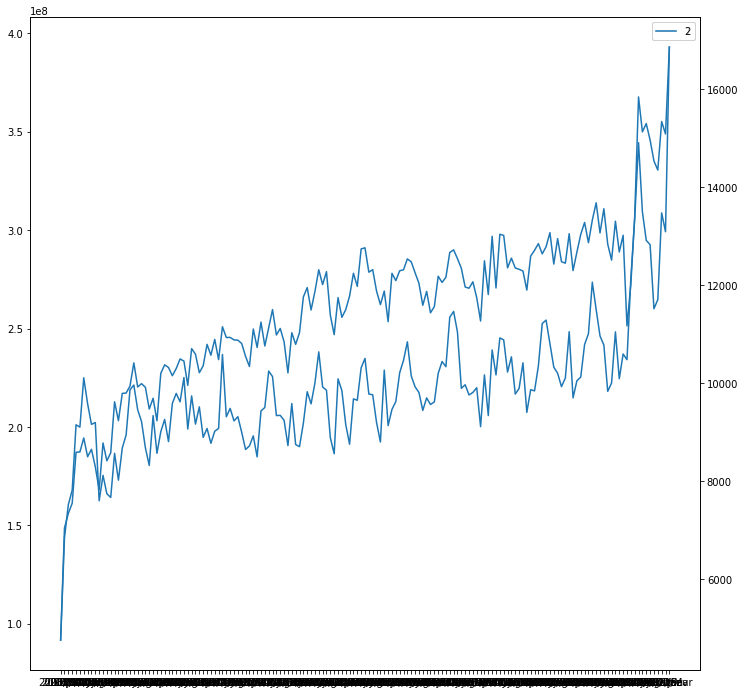

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(gastos.T["35 São Paulo"],label="1")
ax2 = ax.twinx()
ax2.plot(df.T["35 São Paulo"],label="2")
ax.legend(loc=1)
ax2.legend(loc=0)

In [ ]:
a=(len(gastos.T["35 São Paulo"]))

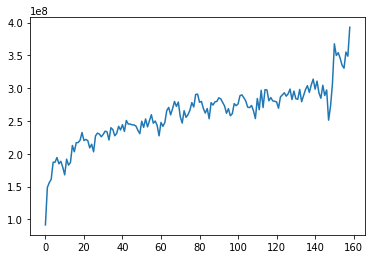

In [ ]:
plt.plot(range(a),gastos.T["35 São Paulo"])

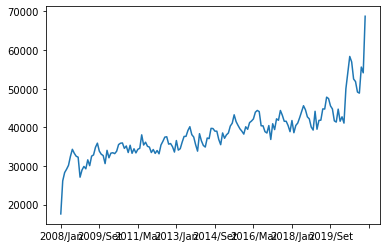

In [ ]:
df.sum().plot()


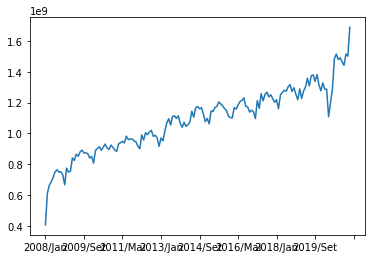

In [ ]:
gastos.sum().plot()

In [ ]:
newdf = pd.DataFrame(np.repeat(df.values, 3, axis=1))
print(newdf)

In [ ]:
df.T.iloc[np.arange(len(df)).repeat(3)].T

In [ ]:
pop.T.iloc[np.arange(len(pop.T)).repeat(13)].T
pop.iloc[:,np.arange(len(pop.T)).repeat(12)]

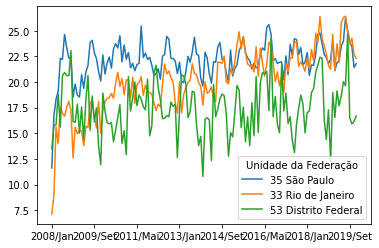

In [ ]:
pd.options.display.float_format = "{:.3f}".format
obitos_pc = df.iloc[:,:144]/pop.iloc[:,np.arange(len(pop.T)).repeat(12)].values*100000
obitos_pc.T[["35 São Paulo","33 Rio de Janeiro","53 Distrito Federal"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f091be134d0>,
      dtype=object)

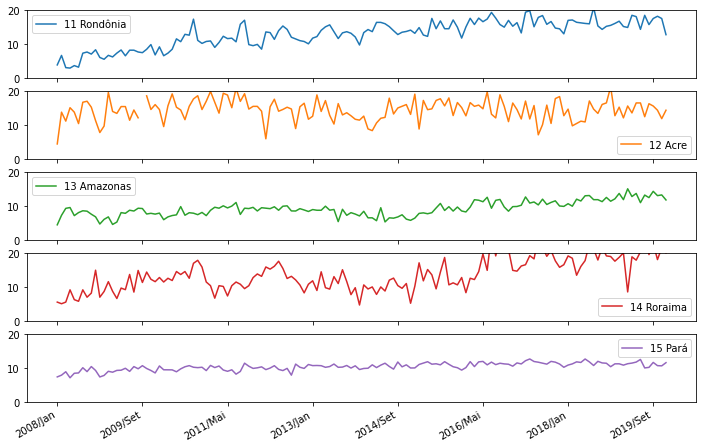

In [ ]:
obitos_pc.head().T.plot(figsize=(12,8),subplots=True,ylim=(0,20))